In [7]:
from OptUtils import *

In [10]:
pixels, verts_mask = render(verts, K)

In [41]:
I = np.zeros_like(Dt)

In [18]:
I[pixels[verts_mask,0], pixels[verts_mask,1]] = verts[verts_mask, 2]

In [200]:
def nullspace(A):
    _,_,V=np.linalg.svd(A)
    return V[..., -1:, :].swapaxes(-2,-1)
def select_triangles(p, faces_verts):
    faces_verts = faces_verts.copy()
    faces_verts[...,:,1:] -= faces_verts[...,:,0:1]
    faces_verts[...,:,0] -= p
    st = nullspace(faces_verts)
    st = st[...,1:,:]/st[...,0:1,:]
    s,t = st[...,0:1,:], st[...,1:2,:]
    mask = np.all([s>=0, s<=1, t>=0, t<=1, s+t<=1], axis=0)[:,0,0]
    return mask, s[mask,0,0], t[mask,0,0]
    

In [ ]:
I = np.zeros_like(Dt)

verts_sensor = K@verts.T
verts_sensor = verts_sensor[:-1, :]/verts_sensor[-1:, :]
verts_sensor = np.hstack([verts_sensor.T, verts[:,-1:]])
faces_verts = verts_sensor[faces][..., :-1].swapaxes(-1,-2)
result = np.ones((*I.shape, 3))*-1
result_weights = np.ones((*I.shape, 3))*-1
for v in faces_verts.shape[0]:
    min_i, min_j = np.floor(faces_verts[0,...].min(axis=1))
    max_i, max_j = np.ceil(faces_verts[0,...].max(axis=1))
    for i in range(int(min_i), int(max_i+1)):
        for j in range(int(min_j), int(max_j+1)):
            p = np.array([i, j])
            faces_mask,s,t = select_triangles(p, faces_verts[v:v+1,...])
            if np.any(faces_mask):
                real_face_verts = verts_sensor[faces][face_mask,...]
                real_face_depths = s*real_face_verts[...,1,-1]+t*real_face_verts[...,2,-1]+real_face_verts[...,0,-1]
                where = real_face_depths.argmin()
                if I[i,j]==-1 or real_face_depths[where]<I[i,j]:
                    result[i,j,:] = faces[np.where(faces_mask)[0][where]]
                    result_weights[i,j,:]=np.array([1, s[where], t[where]])
                    I[i,j] = real_face_depths[where]
        print("Progress: {:0>3} {:0>3}".format(v),end='\r',flush=True)

In [230]:
select_triangles(p, faces_verts[0:1,...])

array([ 106.52912463,  375.48070771])

In [231]:
result

[array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1, -1, -1]),
 array([-1

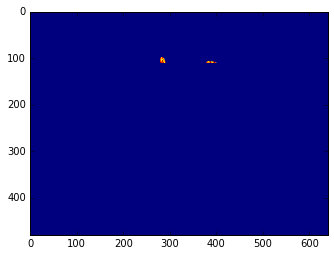

In [227]:
plt.imshow(I)

In [207]:
faces[faces_mask]

array([[5260, 5312, 5257],
       [5316, 5264, 5314]])

In [198]:
verts_sensor[faces][face_mask,...]

array([[[ 459.7897085 ,  420.72810027,    1.27499998],
        [ 463.60216479,  414.73713562,    1.27499998],
        [ 460.82661775,  416.03327218,    1.26561213]],

       [[ 463.51294675,  424.51664582,    1.30401802],
        [ 456.6789969 ,  417.68269597,    1.30401802],
        [ 464.73935952,  421.85520728,    1.29296875]]])

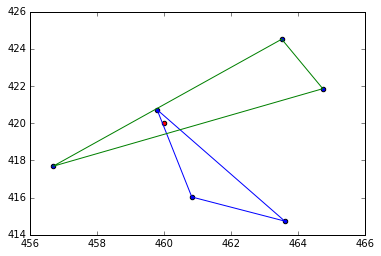

In [172]:

plt.scatter([p[0]], [p[1]], c = "red")
for i in range(verts_sensor[faces][face_mask,...].shape[0]):
    Triangles = verts_sensor[faces][face_mask,...][i,...,:-1]
    plt.scatter(Triangles[:,0], Triangles[:,1])
    plt.plot(Triangles[[0,1,2,0],0], Triangles[[0,1,2,0],1])

In [251]:
def householder(x):
    x = np.atleast_2d(x).T
    e1 = np.array([[1],[0],[0]])
    v = x+np.sign(x[0])*np.linalg.norm(x)*e1
    #return v
    Hv = np.eye(3)-2*(v@v.T)/(v.T@v)
    Hvd = Hv[1:]
    return Hvd

In [81]:
householder(np.array([[1,2,3]]))

array([[-0.53452248,  0.77454192, -0.33818712],
       [-0.80178373, -0.33818712,  0.49271932]])

In [109]:
np.array([[[[1,2,3]]]])@nullspace(np.array([[[[1,2,3]]]]))

array([[[[  2.22044605e-16]]]])

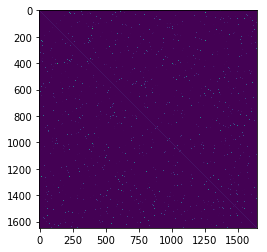

In [43]:
faces.shape

## Necessary Libraries

In [1]:
from PIL import Image
import numpy.linalg as LA
from numpy.linalg import norm
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
%matplotlib notebook
%load_ext line_profiler

## Defining function to update TSDF

In [2]:
from TSDF import update_TSDF
GPU = False

if GPU:
    np = __import__("cupy")
    memory_pool = np.cuda.MemoryPool()
    np.cuda.set_allocator(memory_pool.malloc)
    pinned_memory_pool = np.cuda.PinnedMemoryPool()
    np.cuda.set_pinned_memory_allocator(pinned_memory_pool.malloc)
else:
    np = __import__("numpy")

## Update TSDF

In [3]:
def load_depth(n):
    img = np.array(Image.open('../data/umbrella/frame-{:0>6}.depth.png'.format(n)))/1000
    return img*(img<1.4)

In [4]:
from time import time
start = time()
x_range = (-1,1)
y_range = (-1,1)
z_range = (0.7,3)
N = 128
t_range = list(range(0,150,1))
t = t_range[0]
tau = (z_range[1]-z_range[0])/N*1
TSDF_v = np.ones((N,N,N))*0.01
TSDF_w = np.zeros((N,N,N))
idces = np.stack(np.meshgrid(np.arange(TSDF_v.shape[0]), np.arange(TSDF_v.shape[1]), np.arange(TSDF_v.shape[2])), 3).reshape([-1,3]).T
dc_idces = (idces/np.array(TSDF_v.shape)[:,None]*\
    np.array([[x_range[1]-x_range[0]],[y_range[1]-y_range[0]],[z_range[1]-z_range[0]]])+\
    np.array([[x_range[0]],[y_range[0]],[z_range[0]]])).T[...,None]
K = np.array([[570.342, 0, 320], [0, 570.342, 240], [0, 0, 1]])
Kinv = np.linalg.inv(K)
Dt = load_depth(t)
rMat = np.repeat(np.eye(3)[None,...], dc_idces.shape[0], 0)
tvec = np.zeros((dc_idces.shape[0], 3,1))
ckp1 = time()
update_TSDF(rMat, tvec, Dt, K, TSDF_v, TSDF_w, tau, idces, dc_idces, GPU=GPU)
ckp2 = time()
# Use marching cubes to obtain the surface mesh
if GPU:
    TSDF_v_cpu = np.asnumpy(TSDF_v)
else:
    TSDF_v_cpu = TSDF_v
verts, faces, normals, values = measure.marching_cubes_lewiner(TSDF_v_cpu, 0)
verts[:,0] = verts[:,0]/N*(x_range[1]-x_range[0])+x_range[0]
verts[:,1] = verts[:,1]/N*(y_range[1]-y_range[0])+y_range[0]
verts[:,2] = verts[:,2]/N*(z_range[1]-z_range[0])+z_range[0]
end = time()
print("Data Prep: {:.3f}s, Calculating TSDF: {:.3f}s, Marching Cube: {:.3f}s, Total: {:.3f}s".format(ckp1-start, ckp2-ckp1, end-ckp2, end-start))


Data Prep: 0.238s, Calculating TSDF: 0.227s, Marching Cube: 0.046s, Total: 0.511s


## Writing to OBJ file

In [5]:
def write_to_obj(verts, normals, faces, filename="object.obj"):
    with open(filename, "wt") as f:
        f.write("# OBJ file created by some python code\n")
        f.write("#\n")
        f.write("g Obj{}\n".format(N))
        f.write("\n")
        for v in verts:
            f.write("v  {:.4f}  {:.4f}  {:.4f}\n".format(v[0], v[1], v[2]))
        f.write("\n")
        for n in normals:
            f.write("n  {:.4f}  {:.4f}  {:.4f}\n".format(n[0], n[1], n[2]))
        f.write("\n")
        for face in faces:
            f.write("f  {}  {}  {}\n".format(face[0]+1, face[1]+1, face[2]+1))
write_to_obj(verts, normals, faces)

# Nodes

In [6]:
from WarpField import *

In [7]:
def add_node(e_node,n_vert,radius):#e_node s existing nodes, n_vert is the new vertices
    i=0;n=np.Inf;n_node=[]
    for i in range(e_node.shape[0]):
        diffnorm=np.linalg.norm(n_vert-e_node[i,:],axis=1)
        del_ind=np.where(diffnorm<radius)[0]
        n_vert=np.delete(n_vert,del_ind,axis=0)
    new_nodes=nodes(n_vert,radius)
    n_nodes=np.vstack((e_node,new_nodes))
    return n_nodes

In [8]:
def toHomo(x):
    # converts points from inhomogeneous to homogeneous coordinates
    if x.ndim == 1:
        return np.hstack((x,1))
    else:
        return np.vstack((x,np.ones((1,x.shape[1]))))


def fromHomo(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1] / x[-1]

In [9]:
# start_time=time()
# eps = 0.045 #meters
# node_idces = getNodes(verts, eps)
# dg_v = verts[node_idces, :]
# dg_w = k_nearest(dg_v, dg_v, 1)[1][:,0]/2
# dg_se3 = np.zeros((node_idces.shape[0], 6))
# print("Number of nodes:", dg_v.shape[0])
# print("--- %s seconds ---" % (time() - start_time))

In [10]:
# start_time=time()
# verts_neighbor, verts_neighbor_dist = k_nearest(verts,dg_v,8)
# print("--- %s seconds ---" % (time() - start_time))

In [11]:
def calc3DMap(depthmap,K):
    K_inv = LA.inv(K)
    mask = depthmap!=0
    m, n = depthmap.shape[:2]
    X,Y = np.meshgrid(np.arange(depthmap.shape[0]), np.arange(depthmap.shape[1]))
    world_pts = (K_inv@np.vstack([X.flatten(), Y.flatten(), np.ones((X.size))])) * depthmap.T.flatten()[None, ...]
    world_pts = world_pts.reshape((3, n, m)).transpose([2,1,0])

    return world_pts, mask

In [12]:
# nVerts = verts.shape[0]
# nNodes = dg_v.shape[0]
# nNeighbors = 8

# # dg_se3_new = dg_se3.copy()
# # dg_v_new = dg_v.copy()


In [13]:
def calcDataJacobian(verts, normals, dg_v, dg_w, dg_se3, vl_u, mask_sensor, verts_neighbor):
    
    nVerts = verts.shape[0]
    nNodes = dg_v.shape[0]
    nNeighbors = verts_neighbor.shape[1]
    
    error_data = np.zeros(nVerts)
    pixels = np.zeros((nVerts, 2), dtype=np.int)
    jacobian = np.zeros((nVerts, 6*nNodes))
    gradient = np.zeros(6*nNodes)
    hessian_blocks = np.zeros((6*nNodes, 6))
    
    
    start_time=time()
    proj_count = 0
    
    weights = np.exp(-np.sum((dg_v[verts_neighbor]-verts[:,None,:])**2, axis=2) / (2*dg_w[verts_neighbor]**2))
    #     Dual quaternion of each neighboring node
    dq = se32dq(dg_se3[verts_neighbor])
    #     Blending
    DQB = (weights[:,None,:]@dq)[:,0,:]
    #     Normalizing DQB, norm will be used in calculating d_DQB / d_dq
    norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)
    DQB = DQB / norm_DQB
    rMat, tvec = dq2SE3(DQB)
    #     Warping, note that normal does not depend on t
    verts_warped = (rMat @ verts[...,None])[...,0] + tvec
    normals_warped = (rMat @ normals[...,None])[...,0] # No translation
    #     Pixels data association
    pixels, mask = render(verts_warped, K)
#     pixels = np.round(fromHomo(K @ verts_warped.T).T).astype(np.int)
#     mask = np.all([np.all(pixels>0, axis=1), pixels[:, 0]<480, pixels[:,1]<640], axis=0)
    mask_t = mask_sensor[pixels[mask, 0], pixels[mask, 1]]
    mask[mask] = mask_t
    proj_count = mask.sum()
    #     Energy term
    error_data[mask] = np.matmul(normals_warped[mask,None,...], (verts_warped[mask,...,None] - vl_u[pixels[mask,0],pixels[mask,1]][...,None]))[:,0,0]
    
    for i in range(nVerts):
    #     if mask[i] == False:
    #         continue

        neighbors = verts_neighbor[i]
        if mask[i]==False:
            continue

        #     As the names suggest
        dv_ddq = np.hstack((drotated_dq0(verts[i], DQB[i,:4]), np.zeros((3,4)))) + dt_ddq(DQB[i,:])  
        dn_ddq = np.hstack((drotated_dq0(normals[i], DQB[i,:4]), np.zeros((3,4)))) # No translation
        #     d_Energy / d_DQB
        block1 = error_data[i] * ((verts_warped[i,:] - vl_u[pixels[i,0],pixels[i,1]]) @ dn_ddq + normals_warped[i,:] @ dv_ddq)
        #     Jacobian of DQB WRT each dual quaternion

        for j in range(nNeighbors):
    #         d_DQB / d_dq
            block2 = weights[i,j] * (np.identity(8) / norm_DQB[i,0] - \
            DQB[i,:].reshape(-1,1) @ np.hstack([DQB[i, :4], [0.,0.,0.,0.]]).reshape(1,-1) / norm_DQB[i,0])
    #         Transform back to se3 to calculate d_dq / d_se3
            se3 = dg_se3[neighbors[j]]
    #         Previously se3 = dq2se3(dq[j])
    #         d_dq / d_se3
            block3 = np.hstack((ddq_dw(se3[:3], se3[3:]), np.vstack([np.zeros((4, 3)), dqe_dt(se3[:3])])))
    #         Final Jacobian
            jacobian[i, 6*neighbors[j]:6*neighbors[j]+6] = block1 @ block2 @ block3
    #         Gradient
            gradient[6*neighbors[j]:6*neighbors[j]+6] += \
            error_data[i] * jacobian[i, 6*neighbors[j]:6*neighbors[j]+6]
    #         Diagonal Hessian blocks
            hessian_blocks[6*neighbors[j]:6*neighbors[j]+6] += \
            jacobian[i, 6*neighbors[j]:6*neighbors[j]+6].reshape(-1,1)\
            @ jacobian[i, 6*neighbors[j]:6*neighbors[j]+6].reshape(1,-1)
    cost_mean = (error_data**2).sum() / (2*proj_count)
    print("Mean cost: ", cost_mean)
#     print("Points projected on image planes: ", proj_count, '/', nVerts)
#     print("--- %s seconds ---" % (time() - start_time))
    
    return error_data, cost_mean, weights, pixels, jacobian, hessian_blocks, gradient

In [14]:
def updateAll(verts, normals, dg_se3, vl_u, mask_sensor, weights, verts_neighbor,\
              hessian_blocks, gradient, steplength):
    
    verts_new = np.zeros_like(verts)
    normals_new = np.zeros_like(normals)
    dg_se3_new = dg_se3.copy()
    start_time=time()
    proj_count = 0
    #     print(steplength)
    dg_se3_new += steplength * gradient.reshape([-1,6])
    
    error_data = np.zeros(nVerts)
    #     Dual quaternion of each neighboring node
    dq = se32dq(dg_se3_new[verts_neighbor])
    #     Blending
    DQB = (weights[:,None,:]@dq)[:,0,:]
    #     Normalizing DQB, norm will be used in calculating d_DQB / d_dq
    norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)
    DQB = DQB / norm_DQB
    rMat, tvec = dq2SE3(DQB)
    #     Warping, note that normal does not depend on t
    verts_warped = (rMat @ verts[...,None])[...,0] + tvec
    normals_warped = (rMat @ normals[...,None])[...,0] # No translation
    #     Pixels data association
    pixels = np.round(fromHomo(K @ verts_warped.T).T).astype(np.int)
    mask = np.all([np.all(pixels>0, axis=1), pixels[:, 0]<480, pixels[:,1]<640], axis=0)
    mask_t = mask_sensor[pixels[mask, 0], pixels[mask, 1]]
    mask[mask] = mask_t
    proj_count = mask.sum()
    #     Energy terme planes: ", proj_count, '/', nVerts)
#     print("--- %s seconds ---" % (time() - start_time))
    error_data[mask] = np.matmul(normals_warped[mask,None,...], (verts_warped[mask,...,None] - vl_u[pixels[mask,0],pixels[mask,1]][...,None]))[:,0,0]
    
    cost_mean = (error_data**2).sum() / (2*proj_count)
#     print("Updated mean cost: ", cost_mean) 
#     print("Points projected on image planes: ", proj_count, '/', nVerts)
#     print("--- %s seconds ---" % (time() - start_time))
    
    return dg_se3_new

In [15]:
depthmap = load_depth(0)
pixels = np.stack(np.meshgrid(np.arange(depthmap.shape[0]), np.arange(depthmap.shape[1]))).reshape(2, -1)
pts = depthmap[pixels[0,:], pixels[1,:]]*(Kinv@np.vstack([pixels, np.ones(pixels.shape[1])]))
pts = pts[:,depthmap[pixels[0,:], pixels[1,:]]!=0]

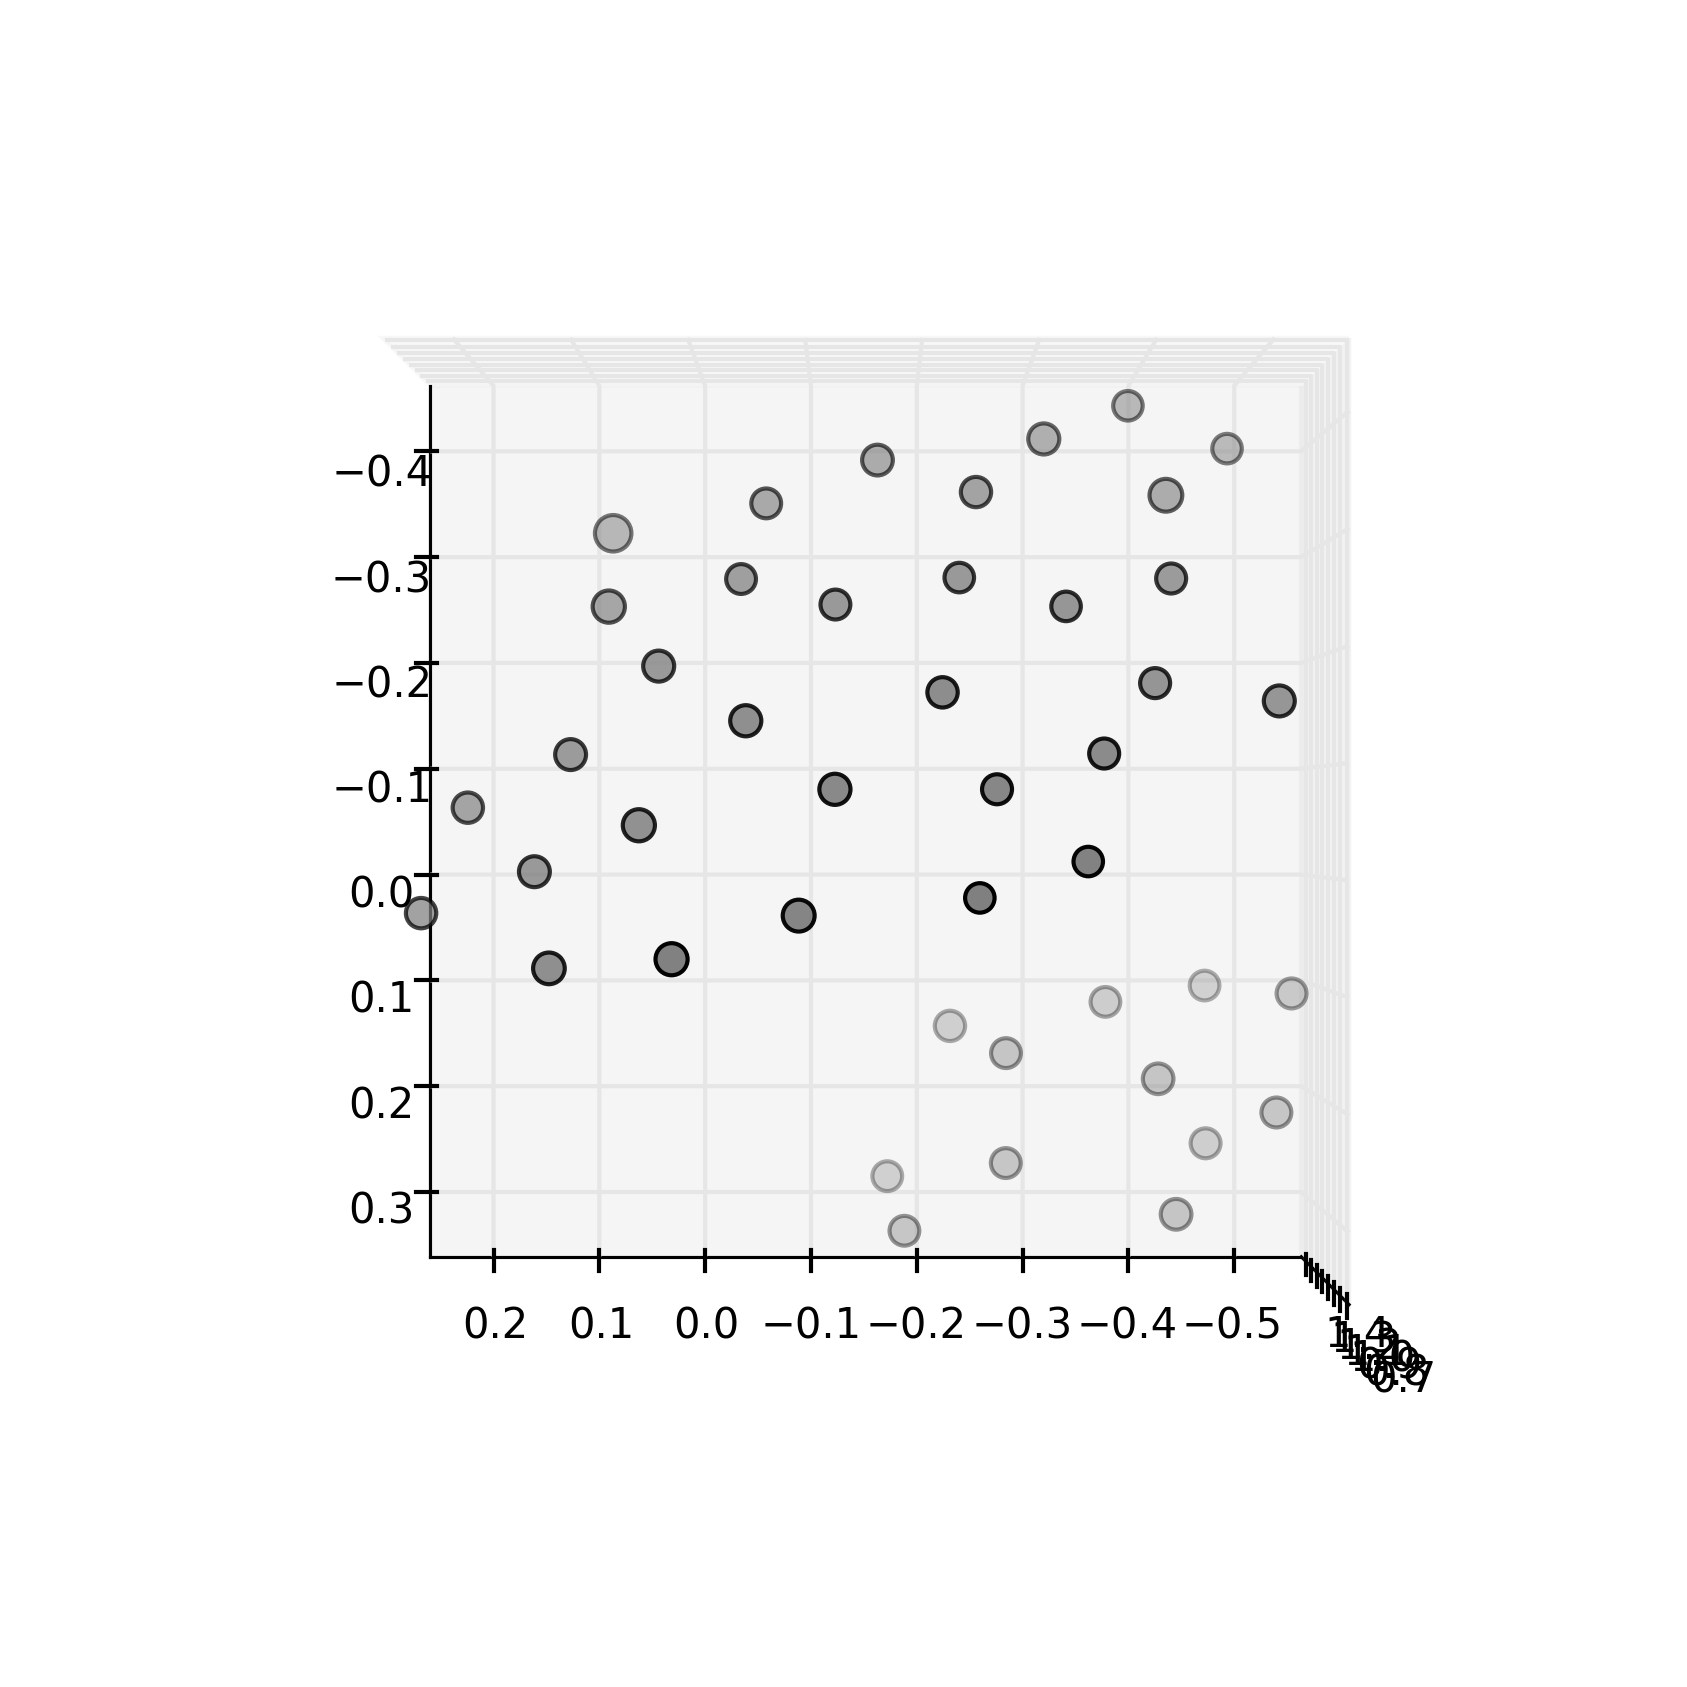

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%config InlineBackend.figure_format = 'png'

def equalize_ratio(ax, X, Y, Z):
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

P = dg_v.copy()
P[:,1] *= -1
fig = plt.figure(figsize=(7,7), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-90, 180)
ax.scatter(P[:,0], P[:,1], P[:,2], s=dg_w*1000, c='grey')
equalize_ratio(ax, *P.T)
#plt.savefig("nodemap.png")
plt.show()

In [ ]:
from time import time
from OptUtils import *
from WarpField import *
def calc3DMap(depthmap,K):
    K_inv = LA.inv(K)
    mask = depthmap!=0
    m, n = depthmap.shape[:2]
    X,Y = np.meshgrid(np.arange(depthmap.shape[0]), np.arange(depthmap.shape[1]))
    world_pts = (K_inv@np.vstack([X.flatten(), Y.flatten(), np.ones((X.size))])) * depthmap.T.flatten()[None, ...]
    world_pts = world_pts.reshape((3, n, m)).transpose([2,1,0])

    return world_pts, mask

eps = 0.1 #meters
nNeighbors = 8
nVerts = verts.shape[0]
nNodes = 100

start = time()
node_idces = getNodes(verts, eps, nNodes)
dg_v = verts[node_idces, :]
dg_w = k_nearest(dg_v, dg_v, nNeighbors)[1].min(axis=1)/2
dg_se3 = np.zeros((node_idces.shape[0], 6))
raise ValueError("HaHa")
nNodes = dg_v.shape[0]
verts_neighbor, verts_neighbor_dist = k_nearest(verts,dg_v,8)
dc_idces_neighbor, dc_idces_neighbor_dist = k_nearest(dc_idces[...,0], dg_v, nNeighbors)
weights_dc_idces = np.exp(-np.sum((dc_idces[...,0][dc_idces_neighbor]-dc_idces[...,0][:,None,:])**2, axis=2) / (2*dg_w[dc_idces_neighbor]**2))
print(time()-start)
    
write_to_obj(verts, normals, faces, "Objects/C{:0>6}.obj".format(t))
for t in t_range[1:]:
    start = time()
    
    depthmap = load_depth(t)
    vl_u, mask_sensor = calc3DMap(depthmap, K)

    dg_se3_test = dg_se3.copy()
    max_iter = 10
    last_error = np.inf
    last_status = None
    step_length = 1e-2
    for n_iter in range(max_iter):
    #     if n_iter>=0.5*max_iter:
    #         step_length *= 0.3
        error_data, cost_mean, weights, pixels, jacobian, hessian_blocks, gradient = \
        calcDataJacobian(verts, normals, dg_v, dg_w, dg_se3_test, vl_u, mask_sensor, verts_neighbor)

        dg_se3_test = updateAll(verts, normals, dg_se3_test, vl_u, mask_sensor, weights, verts_neighbor,\
                  hessian_blocks, gradient, step_length)
        if cost_mean<last_error:
            step_length *= 2
            last_status = (error_data.copy(), cost_mean, weights.copy(), pixels.copy(), jacobian.copy(), hessian_blocks.copy(), gradient.copy(), dg_se3_test.copy())
            last_error = cost_mean
        else:
            step_length /= 2
            if last_status:
                error_data, cost_mean, weights, pixels, jacobian, hessian_blocks, gradient, dg_se3_test = last_status
            else:
                dg_se3_test = dg_se3.copy()
    if last_status:
        error_data, cost_mean, weights, pixels, jacobian, hessian_blocks, gradient, dg_se3_test = last_status
    else:
        dg_se3_test = dg_se3.copy()
    dg_se3 = dg_se3_test
    print(time()-start)
    
    #     Dual quaternion of each neighboring node
    dq = se32dq(dg_se3[dc_idces_neighbor])
    #     Blending
    DQB = (weights_dc_idces[:,None,:]@dq)[:,0,:]
    #     Normalizing DQB, norm will be used in calculating d_DQB / d_dq
    norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)
    DQB = DQB / norm_DQB
    DQB[np.isnan(DQB.sum(axis=1)),:] = np.array([[1,0,0,0,0,0,0,0]])
    rMat, tvec = dq2SE3(DQB)
    print(time()-start)
    update_TSDF(rMat, tvec[...,None], depthmap, K, TSDF_v, TSDF_w, tau, idces, dc_idces, GPU=GPU)
    # Use marching cubes to obtain the surface mesh
    if GPU:
        TSDF_v_cpu = np.asnumpy(TSDF_v)
    else:
        TSDF_v_cpu = TSDF_v
    verts, faces, normals, values = measure.marching_cubes_lewiner(TSDF_v_cpu, 0)
    verts[:,0] = verts[:,0]/N*(x_range[1]-x_range[0])+x_range[0]
    verts[:,1] = verts[:,1]/N*(y_range[1]-y_range[0])+y_range[0]
    verts[:,2] = verts[:,2]/N*(z_range[1]-z_range[0])+z_range[0]
    print(time()-start)
    nVerts = verts.shape[0]
    
    verts_neighbor, verts_neighbor_dist = k_nearest(verts, dg_v, nNeighbors)
    
    write_to_obj(verts, normals, faces, "Objects/C{:0>6}.obj".format(t))
    print(time()-start)
    weights = np.exp(-np.sum((dg_v[verts_neighbor]-verts[:,None,:])**2, axis=2) / (2*dg_w[verts_neighbor]**2))
    #     Dual quaternion of each neighboring node
    dq = se32dq(dg_se3[verts_neighbor])
    #     Blending
    DQB = (weights[:,None,:]@dq)[:,0,:]
    #     Normalizing DQB, norm will be used in calculating d_DQB / d_dq
    norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)
    DQB = DQB / norm_DQB
    rMat, tvec = dq2SE3(DQB)
    #     Warping, note that normal does not depend on t
    verts_warped = (rMat @ verts[...,None])[...,0] + tvec
    normals_warped = (rMat @ normals[...,None])[...,0] # No translation
    write_to_obj(verts_warped, normals_warped, faces, "Objects/C{:0>6}_Warped.obj".format(t))
    print(t, time()-start)
    start = time()

C:\Users\marti\Miniconda3\lib\site-packages\scipy\spatial\kdtree.py:74: RuntimeWarning: invalid value encountered in sqrt
  return minkowski_distance_p(x, y, p)**(1./p)


8.747997999191284
Mean cost:  0.000157621722854
Mean cost:  7.26865135085e-05
Mean cost:  7.06629346464e-05
Mean cost:  5.80121647466e-05
Mean cost:  5.20301615563e-05
Mean cost:  4.55407288391e-05
Mean cost:  4.18818204734e-05
Mean cost:  8.16005082333e-05
Mean cost:  8.16005082333e-05
Mean cost:  8.16005082333e-05
34.834999084472656


C:\Users\marti\Miniconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\marti\Miniconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide


44.17399883270264
44.51399898529053
44.57999920845032
1 44.803001165390015
Mean cost:  0.000215517961254
Mean cost:  0.000183573858778
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
Mean cost:  0.000193635038764
38.433997631073
47.78499698638916
48.05699801445007
48.13100028038025
2 48.33199977874756
Mean cost:  0.000202149488134
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
Mean cost:  0.000221813158421
38.24999713897705
47.550997257232666
47.818997621536255
47.883999824523926
3 48.11699652671814
Mean cost:  0.000213860515809
Mean cost:  0.000250415117146
Mean cost:  0.000250415117146
Mean cost:  0.000250415117146
Mean cost:  0.000250

C:\Users\marti\Miniconda3\lib\site-packages\numpy\core\numeric.py:1797: RuntimeWarning: invalid value encountered in subtract
  cp0 -= tmp
C:\Users\marti\Miniconda3\lib\site-packages\numpy\core\numeric.py:1800: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
C:\Users\marti\Miniconda3\lib\site-packages\numpy\core\numeric.py:1803: RuntimeWarning: invalid value encountered in subtract
  cp2 -= tmp


49.78900074958801
50.138999700546265
50.21999955177307
7 50.45904302597046
Mean cost:  0.000405471959162
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
Mean cost:  0.000478623581217
39.458956241607666
48.80695676803589
49.13695573806763
49.21395516395569
8 49.45796036720276
Mean cost:  0.000477806320289
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
Mean cost:  0.000486349637698
39.22584128379822
48.64244246482849
48.945441484451294
49.041444301605225
9 49.268442153930664
Mean cost:  0.000484162400744
Mean cost:  0.000425847628078
Mean cost:  0.00052966999476
Mean cost:  0.00052966999476
Mean cost:  0.00052

In [29]:
weights_dc_idces[:,None,:].shape

(262144, 1, 8)

In [41]:
DQB = (weights_dc_idces[:,None,:]@dq)[:,0,:]
norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)


array([-12.8835371 ,  29.67087995,  27.64720013, -32.61006233,
       -22.34436024,  -3.07396184])

In [48]:
rMat.max()

1.0

In [46]:
#     Dual quaternion of each neighboring node
dq = se32dq(dg_se3[dc_idces_neighbor])
#     Blending
DQB = (weights_dc_idces[:,None,:]@dq)[:,0,:]
#     Normalizing DQB, norm will be used in calculating d_DQB / d_dq
norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)
DQB = DQB / norm_DQB
rMat, tvec = dq2SE3(DQB)

NameError: name 'covis_mat' is not defined

In [31]:
weights = np.exp(-np.sum((dg_v[verts_neighbor]-verts[:,None,:])**2, axis=2) / (2*dg_w[verts_neighbor]**2))
#     Dual quaternion of each neighboring node
dq = se32dq(dg_se3_test[verts_neighbor])
#     Blending
DQB = (weights[:,None,:]@dq)[:,0,:]
#     Normalizing DQB, norm will be used in calculating d_DQB / d_dq
norm_DQB = np.linalg.norm(DQB[:, :4], axis=1, keepdims=True)
DQB = DQB / norm_DQB
rMat, tvec = dq2SE3(DQB)
#     Warping, note that normal does not depend on t
verts_warped = (rMat @ verts[...,None])[...,0] + tvec
normals_warped = (rMat @ normals[...,None])[...,0] # No translation

In [32]:
write_to_obj(verts_warped, normals_warped, faces)

In [75]:
def cross2mat(v):
    if v.ndim==1:
        w = v[None,:]
    else:
        w = v
    zeros = np.zeros((w.shape[0],))
    result = np.array([[zeros, -w[:,2], w[:,1]], [w[:,2], zeros, -w[:,0]], [-w[:,1], w[:,0], zeros]]).transpose([2,0,1])
    if v.ndim==1:
        return result[0,...]
    return result
def w2R(w):
    # given the angle-axis representation w return the rotation matrix
    w = dg_se3_test[:, :3]
    theta = norm(w, axis=1)
    R = np.eye(3)[None,...] * np.cos(theta)[:,None,None] +\
        np.sinc(theta/np.pi)[:,None,None]*cross2mat(w) +\
        ((1 - np.cos(theta)) / theta**2)[:,None,None]*(w[...,None]@w[:,None,:])
    return R